In [2]:
from __future__ import print_function
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from collections import Counter, OrderedDict


from PIL import Image as PImage
from os import listdir
from pickle import dump
import matplotlib.pyplot as plt
import PIL, cv2, os, json, h5py, keras, csv, random
from glob import glob
from IPython.display import SVG

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from keras.backend.tensorflow_backend import set_session
from keras.callbacks import TensorBoard
from keras.applications.vgg16 import preprocess_input
from keras.utils.vis_utils import plot_model, model_to_dot

#import seaborn as sns

In [3]:
train_path = '../data/aia-picture-classification1/train'
test_path = '../data/aia-picture-classification1/test'
model_path = '../data/aia-picture-classification1/model'

In [4]:
classes = os.listdir(train_path)

In [5]:
sample_images = []
plants = {}
for plant in classes:
    img_path = os.path.join(train_path, plant, '**') 
    path_contents = glob(img_path)
    total_plants = len(path_contents)
    plants[plant] = total_plants
    img = random.sample(path_contents, 1)
    sample_images.append(img)

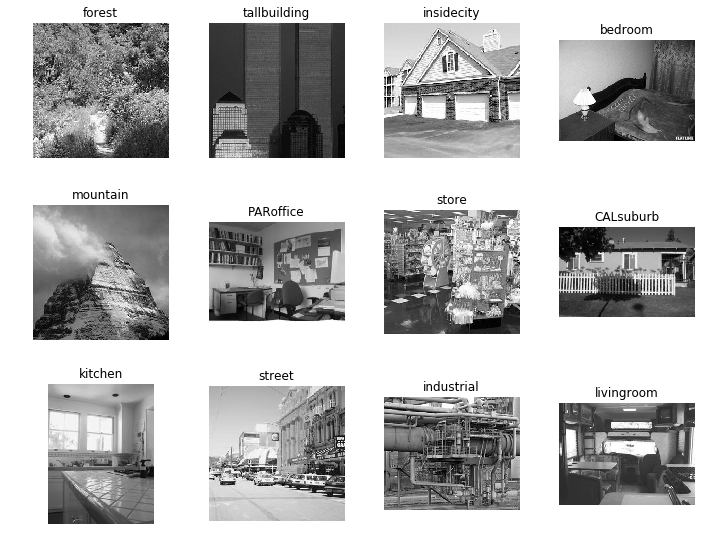

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(0, 12):
    fig.add_subplot(4, 4, i+1)
    fig.tight_layout()
    img = cv2.imread(sample_images[i][0])
    #img = cv2.cvtColor(img, cv2.cv2.COLOR_GRAY2BGR)     
    plt.imshow(img)
    plt.axis('off')
    plt.title(classes[i])    
plt.show()


In [7]:
img[::1]

array([[[ 53,  53,  53],
        [ 48,  48,  48],
        [ 44,  44,  44],
        ...,
        [ 67,  67,  67],
        [ 64,  64,  64],
        [ 62,  62,  62]],

       [[ 52,  52,  52],
        [ 46,  46,  46],
        [ 43,  43,  43],
        ...,
        [ 65,  65,  65],
        [ 65,  65,  65],
        [ 65,  65,  65]],

       [[ 51,  51,  51],
        [ 45,  45,  45],
        [ 43,  43,  43],
        ...,
        [ 63,  63,  63],
        [ 66,  66,  66],
        [ 67,  67,  67]],

       ...,

       [[ 56,  56,  56],
        [ 54,  54,  54],
        [ 52,  52,  52],
        ...,
        [150, 150, 150],
        [147, 147, 147],
        [146, 146, 146]],

       [[ 56,  56,  56],
        [ 54,  54,  54],
        [ 52,  52,  52],
        ...,
        [146, 146, 146],
        [143, 143, 143],
        [142, 142, 142]],

       [[ 56,  56,  56],
        [ 54,  54,  54],
        [ 52,  52,  52],
        ...,
        [144, 144, 144],
        [141, 141, 141],
        [139, 139, 139]]

In [8]:
img[0][:,2].mean()

109.68941979522184

In [9]:
for i in range(3):
    print(i)

0
1
2


In [10]:
sample_images = []
chnnel_stat = {}
plants = {}
for plant in classes:
    chnnel_stat[plant] = [0,0,0]
    img_path = os.path.join(train_path, plant, '**') 
    path_contents = glob(img_path)
    total_plants = len(path_contents)
    plants[plant] = total_plants
    img = random.sample(path_contents, 10)
    sample_images.append(img)
    
    for ii in img:
        gg = cv2.imread(ii)
        print([gg[:,:,ele].mean() for ele in range(3)])
    
    break
    #for idx, channel in enumerate(chnnel_stat[plant]):
    #   chnnel_stat[plant][idx] = [ii[0][:,2] for ii in img]

[88.87800598144531, 88.87800598144531, 88.87800598144531]
[118.20852661132812, 118.20852661132812, 118.20852661132812]
[102.56947326660156, 102.56947326660156, 102.56947326660156]
[125.08294677734375, 125.08294677734375, 125.08294677734375]
[43.933013916015625, 43.933013916015625, 43.933013916015625]
[97.14773559570312, 97.14773559570312, 97.14773559570312]
[98.12730407714844, 98.12730407714844, 98.12730407714844]
[105.12098693847656, 105.12098693847656, 105.12098693847656]
[127.56680297851562, 127.56680297851562, 127.56680297851562]
[65.7276611328125, 65.7276611328125, 65.7276611328125]


In [63]:
gg = cv2.imread('../data/aia-picture-classification1/train/industrial/image_0017.jpg')

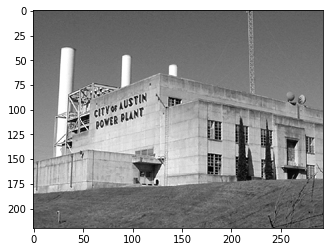

In [64]:
plt.imshow(gg)

In [22]:
gg[:,:,0].mean()

62.37394212394212

In [23]:
gg.shape

(333, 220, 3)

In [24]:
gg[:,:,1]

array([[ 72,  93, 103, ..., 247, 245, 243],
       [ 79,  80,  77, ..., 254, 253, 251],
       [ 92, 104,  95, ..., 251, 249, 245],
       ...,
       [ 40,  40,  40, ...,  68,  69,  68],
       [ 41,  40,  39, ...,  43,  44,  44],
       [ 39,  40,  39, ...,  39,  40,  39]], dtype=uint8)

In [65]:
import autocolorize

In [25]:
gg[:,:,2].mean()

62.37394212394212

In [26]:
gg.mean()

62.37394212394212

In [33]:
gray = cv2.cvtColor(gg, cv2.COLOR_RGB2GRAY)

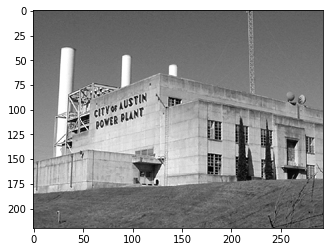

In [53]:
plt.imshow(gg)

In [66]:
classifier = autocolorize.load_default_classifier()
#classifier = autocolorize.load_classifier('bare.prototxt')

Loading /home/wayne/.autocolorize/autocolorize.caffemodel.h5


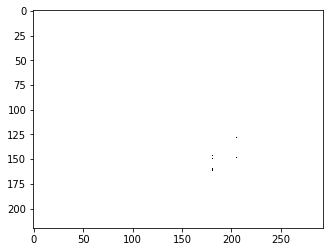

In [67]:
rgb = autocolorize.colorize(gg, classifier=classifier)
plt.imshow(rgb)

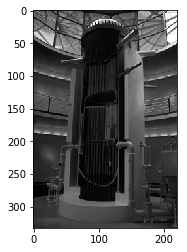

In [39]:
colo = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGRA) 

plt.imshow(colo)

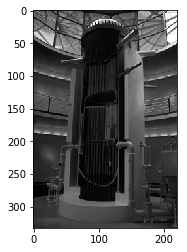

In [29]:
plt.imshow(gg)

In [30]:
gg.shape

(333, 220, 3)

In [31]:
for i in range(333):
    for j in range(220):
        if (gg[i,j,0]<210 and gg[i,j,1]<160):
            gg[i,j]= np.mean(gg[i,j])

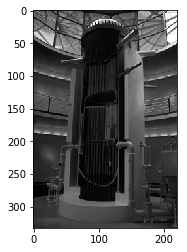

In [32]:
plt.imshow(gg)